In [ ]:
import keras
import numpy as np
import pandas as pd

In [ ]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(
    num_words = 10000
)  #The argument num_words=10000 means
# you’ll only keep the top 10,000 most frequently occurring words in the training data.

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
#Because you’re restricting yourself to the top 10,000 most frequent words, no word
#index will exceed 10,000
max([max(sequence) for sequence in train_data])

9999

In [ ]:
 word_index =imdb.get_word_index()
 reverse_word_index = dict(
     [(value,key) for (key,value) in word_index.items()])
 decoded_review = "/".join(
     [reverse_word_index.get(i-3, "?") for i in train_data[0]]
 )
"""
start_char: int. The start of a sequence will be marked with this character. Set to 1 because 0 is usually the padding character.
oov_char: int. words that were cut out because of the num_words or skip_top limit will be replaced with this character.
index_from: int. Index actual words with this index and higher.
That dictionary you inverted assumes the word indices start from 1.
But the indices returned my keras have <START> and <UNKNOWN> as indexes 1 and 2. (And it assumes you will use 0 for <PADDING>)."""

1646592/1641221 [==============================] - 0s 0us/step


'\nstart_char: int. The start of a sequence will be marked with this character. Set to 1 because 0 is usually the padding character.\noov_char: int. words that were cut out because of the num_words or skip_top limit will be replaced with this character.\nindex_from: int. Index actual words with this index and higher.\nThat dictionary you inverted assumes the word indices start from 1.\nBut the indices returned my keras have <START> and <UNKNOWN> as indexes 1 and 2. (And it assumes you will use 0 for <PADDING>).'

In [ ]:
#Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):  # enumerate() adds counter to an iterable and returns it 
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
#We should also vectorize our labels, which is straightforward:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
#Now the data is ready to be fed into a neural network.

In [ ]:
# MODEL
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
# Using custom losses and metrics
from keras import losses
from keras import optimizers
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [ ]:
# Validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# Training our model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(partial_x_train, # tensorflow.python.keras.callbacks.History ( dictionary aynı zamanda )
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))
#Note that the call to model.fit() returns a History object. This object has a member history, 
#which is a dictionary containing data about everything that happened during training
# OUR MODEL IS OVERFITTING AFTER 4TH EPOCH 


Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.5890 - acc: 0.7075 - val_loss: 0.3799 - val_acc: 0.8695
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3123 - acc: 0.9039 - val_loss: 0.3062 - val_acc: 0.8830
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2247 - acc: 0.9255 - val_loss: 0.2756 - val_acc: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1719 - acc: 0.9455 - val_loss: 0.2752 - val_acc: 0.8900
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1345 - acc: 0.9613 - val_loss: 0.2883 - val_acc: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1061 - acc: 0.9684 - val_loss: 0.2979 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0845 - acc: 0.9794 - val_loss: 0.3227 - val_acc: 0.8802
Epoch 8/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0705 - a

In [ ]:
history_dict = history.history
history_dict.keys()
#The dictionary contains four entries:

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

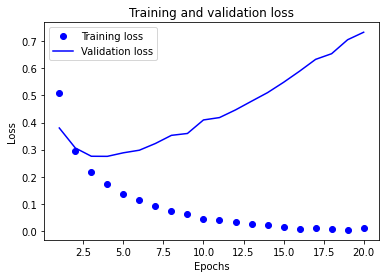

In [ ]:
## Plotting the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

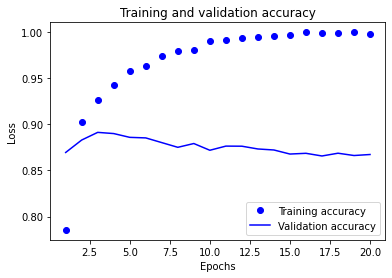

In [ ]:
## Plotting the training and validation accuracy
import matplotlib.pyplot as plt
plt.clf()   # clears the figure
accuracy_values = history_dict["acc"]
val_accuracy_values = history_dict["val_acc"]

epochs = range(1,21)
plt.plot(epochs, accuracy_values, "bo", label = "Training accuracy")
plt.plot(epochs, val_accuracy_values, "b", label = "Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Retraining a model from scratch ( with 4 epoch,cuz its overfitting after this number of epochs like we saw above.)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 26ms/step - loss: 0.5963 - accuracy: 0.6928
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.3143 - accuracy: 0.9027
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2205 - accuracy: 0.9265
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.8762


In [ ]:
results
#This fairly naive approach achieves an accuracy of 88%. 


[0.30997711420059204, 0.8761600255966187]

In [ ]:
# Using a trained network to generate predictions on new data
model.predict(x_test)

array([[0.26454455],
       [0.99998474],
       [0.9751506 ],
       ...,
       [0.2043927 ],
       [0.11741075],
       [0.78086877]], dtype=float32)

In [ ]:
## REUTERS DATASET

from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
test_data[10] #word indices

[1,
 361,
 372,
 8,
 77,
 62,
 325,
 4105,
 336,
 5,
 1605,
 37,
 412,
 453,
 1187,
 229,
 334,
 13,
 4,
 867,
 76,
 4,
 76,
 1726,
 6,
 264,
 2337,
 18,
 82,
 95,
 97,
 2220,
 4,
 1004,
 649,
 18,
 82,
 554,
 136,
 4,
 143,
 334,
 290,
 126,
 5,
 4,
 2820,
 777,
 2,
 1386,
 13,
 954,
 7,
 4,
 314,
 912,
 224,
 4,
 2370,
 1128,
 54,
 429,
 2,
 18,
 82,
 5,
 496,
 1187,
 229,
 57,
 85,
 385,
 593,
 6,
 4,
 867,
 76,
 17,
 12]

In [ ]:
#Encoding the data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
# To vectorize the labels, we can cast the label list as an integer tensor, or
# we can use one-hot encoding. One-hot encoding is a widely used format for categorical data.
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
## Building our network
# Each layer can only access information present in the output of the previous layer.
#So if one layer drops some information, this info can never be recovered by later layers.
# So 16-dimensional space may be too limited to learn to separate 46 different classes. For
#that reason, we'll use larger layers. ( 64 )

# Model Definition
model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape= (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))


In [ ]:
## Compiling the model
model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [ ]:
# Setting aside a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
## Training the model
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 3.0590 - accuracy: 0.4141 - val_loss: 1.6932 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4835 - accuracy: 0.6868 - val_loss: 1.2789 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0421 - accuracy: 0.7780 - val_loss: 1.0980 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8116 - accuracy: 0.8287 - val_loss: 1.0016 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.6229 - accuracy: 0.8693 - val_loss: 0.9453 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 45ms/step - loss: 0.5074 - accuracy: 0.8964 - val_loss: 0.9074 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4073 - accuracy: 0.9164 - val_loss: 0.8883 - val_accuracy: 0.8050
Epoch 8/20
16

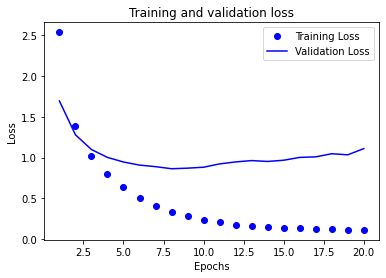

In [ ]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, "bo", label = "Training Loss")
plt.plot(epochs, val_loss, "b", label = "Validation Loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()
#Network begins to overfit after nine epochs, lets train a new network from scratch for 9epochs
 

In [ ]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape =(10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 56ms/step - loss: 3.1303 - accuracy: 0.3900 - val_loss: 1.7228 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 1s 44ms/step - loss: 1.4790 - accuracy: 0.7021 - val_loss: 1.3368 - val_accuracy: 0.7080
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.1049 - accuracy: 0.7669 - val_loss: 1.1781 - val_accuracy: 0.7400
Epoch 4/9
16/16 [==============================] - 1s 44ms/step - loss: 0.8508 - accuracy: 0.8206 - val_loss: 1.0824 - val_accuracy: 0.7750
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.7069 - accuracy: 0.8522 - val_loss: 1.0131 - val_accuracy: 0.7900
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5544 - accuracy: 0.8819 - val_loss: 1.0088 - val_accuracy: 0.7970
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4619 - accuracy: 0.9096 - val_loss: 0.9599 - val_accuracy: 0.8150
Epoch 8/9
16/16 [===

In [ ]:
results

[1.040434718132019, 0.7742653489112854]

In [ ]:
# Generating predictions for new data

predictions = model.predict(x_test)
predictions[0].shape # each entry in predictions is a vector  of lenght 46
np.sum(predictions[2]) # the coefficients in this vector sum to 1
np.argmax(predictions[0]) # the largest entry in the predicted class0

3

In [ ]:
## A different way to handle the labels and the loss

y_train = np.array(train_labels)
y_test = np.array(test_labels) #cast them as an integer tensor
#the only thing this approach would change is the choice of loss function
model.compile(optimizer = "rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics = ["acc"])

In [ ]:
### REGRESSION EXAMPLE

#Loading the Boston housing dataset
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape # (404, 13)
train_targets.shape #(404,) The targets are the median values of owner-occupied homes in k$
test_data.shape #(102,13) 

In [ ]:
### Preparing the data
#Normalizing the data

mean = train_data.mean(axis = 0) #columnwise
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= mean
#note that the quantities used for normalizing the dest data are computed using the training data.
# we should never use in our workflow any quantity computed on the test data.

#Model Definition
def build_model(): # cuz you'll need to instantiate the same model multiple times, yyou better be use a function then
  model = models.Sequential()
  model.add(layers.Dense(64, activation = "relu",
                         input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = "relu"))
  model.add(layers.Dense(1)) #we need just 1 linear layer.
  model.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])
  return model

In [ ]:
build_model()

In [ ]:
np.mean(all_scores) # the average is a much more reliable metric than any single score
# in this case you are off by 2500$

In [ ]:
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = list()
for i in range(k):
  print("processing fold # ",i)
  val_data = train_data[i*num_val_samples: (i+1)* num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1)* num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i* num_val_samples],
       train_data[(i+1)* num_val_samples:]],
       axis = 0
  )
  partial_train_targets = np.concatenate(
  [train_targets[:i * num_val_samples],
  train_targets[(i + 1) * num_val_samples:]],
  axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
  validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)


processing fold #  0
processing fold #  1
processing fold #  2
processing fold #  3


In [ ]:
#Building the history of successive mean K-fold val scores
average_mae_history =  [
                        np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

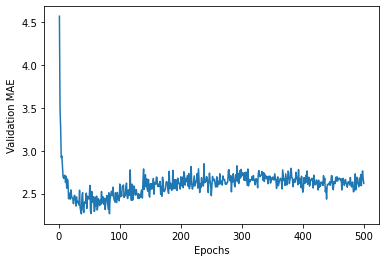

In [ ]:

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
# Omit the first 10 data points, which are on a different scale than the rest
# Replace each point with an exponential moving average of the previous points,
#to obtain a smooth curve

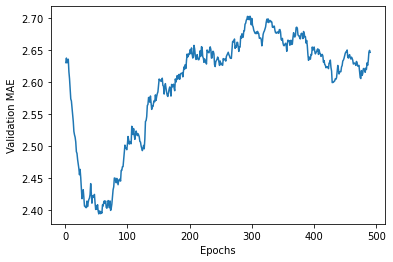

In [ ]:
# plotting val scores with excluding the first 10 data points
def smooth_curve(points, factor = .9):
  smoothed_points = list()
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous* factor+ point*(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) +1 ), smooth_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()
#According to this plot, validation MAE stops improving significantly after 80epochs.
#Past that point, you start overfitting.


In [ ]:
# TRAINING THE FINAL MODEL

model = build_model()
model.fit(train_data, train_targets,
          epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: inf - mae: 19187585336427994391868665015304192.0000


In [ ]:
test_mae_score  # we are still of by about 1900$
